In [1]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from joblib import load
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
model = load('./data/mlSGDClassifier.joblib')

### Lets check performance of our model on test data

In [3]:
#Load overall data and lets drop null
df = pd.read_csv('./data/data_preprocessed.csv')

In [4]:
# Separate into input and output columns
X = df['text']
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [5]:
# Make predictions
ytest = np.array(y_test)
pred_y = model.predict(X_test)

# Evaluate predictions
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.8723539710329461
                         precision    recall  f1-score   support

            APPLICATION       0.70      0.81      0.75        47
                   BILL       0.92      0.85      0.88      2544
            BILL BINDER       0.29      0.46      0.35        71
                 BINDER       0.88      0.88      0.88      2054
    CANCELLATION NOTICE       0.87      0.89      0.88      2358
     CHANGE ENDORSEMENT       0.87      0.90      0.89       181
            DECLARATION       0.47      0.34      0.40       227
   DELETION OF INTEREST       0.93      0.91      0.92      1154
      EXPIRATION NOTICE       0.79      0.89      0.84       142
INTENT TO CANCEL NOTICE       0.61      0.72      0.66        61
     NON-RENEWAL NOTICE       0.88      0.93      0.90       150
          POLICY CHANGE       0.85      0.86      0.86      2399
   REINSTATEMENT NOTICE       0.93      0.97      0.95      1010
         RETURNED CHECK       0.90      0.92      0.91       

In [6]:
#Create dataframe out of confusion_matrix
df1 = pd.DataFrame(confusion_matrix(ytest,pred_y,labels=y.unique()),index=y.unique(),columns=y.unique())
df1

,BILL,RETURNED CHECK,POLICY CHANGE,CANCELLATION NOTICE,DECLARATION,CHANGE ENDORSEMENT,NON-RENEWAL NOTICE,BINDER,REINSTATEMENT NOTICE,DELETION OF INTEREST,EXPIRATION NOTICE,INTENT TO CANCEL NOTICE,APPLICATION,BILL BINDER
BILL,2163,2,103,153,11,0,0,39,1,0,10,6,1,55
RETURNED CHECK,4,154,7,0,0,0,0,2,0,0,1,0,0,0
POLICY CHANGE,57,8,2073,28,26,21,5,111,26,13,12,1,2,16
CANCELLATION NOTICE,51,1,40,2109,15,0,11,9,39,62,4,17,0,0
DECLARATION,16,0,31,9,78,0,0,77,3,7,2,0,2,2
CHANGE ENDORSEMENT,0,0,14,1,1,163,0,0,0,1,1,0,0,0
NON-RENEWAL NOTICE,0,0,3,5,1,0,140,0,1,0,0,0,0,0
BINDER,20,6,149,9,30,2,1,1812,1,0,2,2,11,9
REINSTATEMENT NOTICE,5,0,7,15,3,0,0,0,979,1,0,0,0,0
DELETION OF INTEREST,0,1,7,93,0,1,0,1,0,1050,0,1,0,0


<AxesSubplot:>

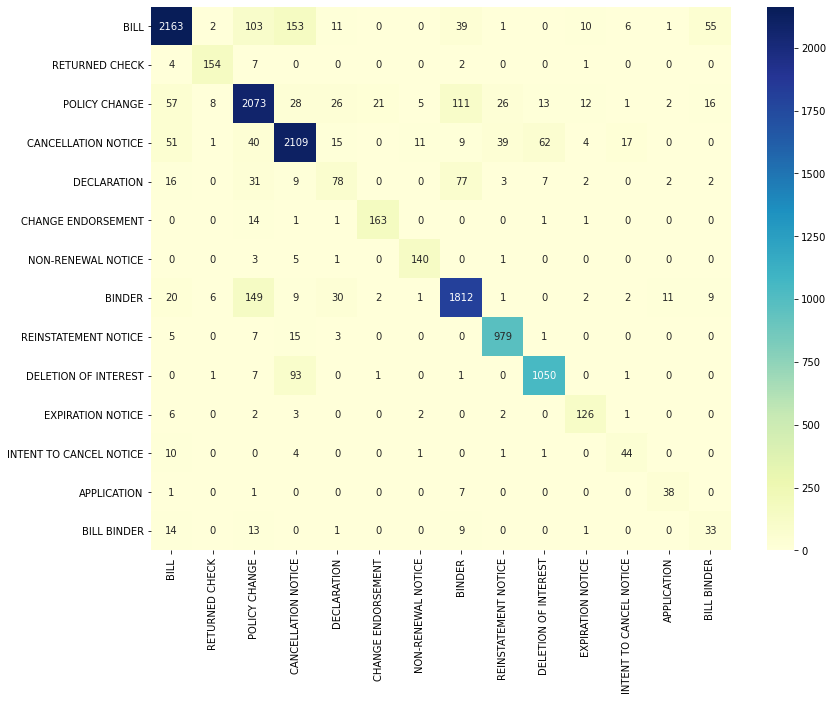

In [7]:
#Heatmap with number of documents
plt.figure(figsize=[13,10])
sns.heatmap(df1, annot=True, fmt="d", cmap="YlGnBu")

<AxesSubplot:>

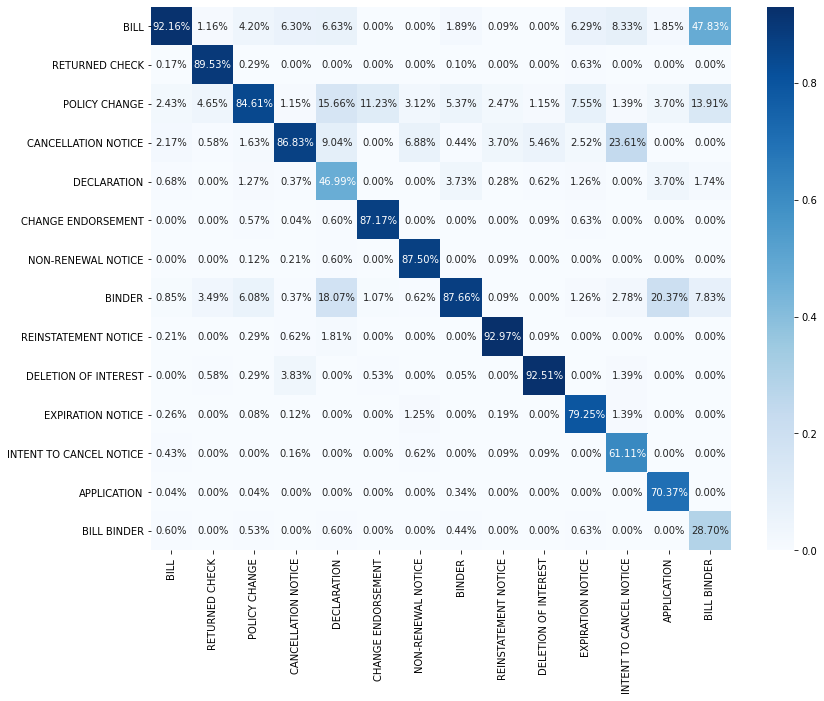

In [8]:
#Heatmap with % documents, this will give us better understanding
plt.figure(figsize=[13,10])
sns.heatmap(df1/np.sum(df1), annot=True, 
            fmt='.2%', cmap='Blues')

### Lets check perfomance of our model on overall data

In [9]:
#Load overall data and lets drop null
df = pd.read_csv('./data/shuffled-full-set-hashed.csv',header=None)
df.columns = ['type','text']
df.dropna(inplace=True)

In [10]:
# Separate into input and output columns
X = df['text']
y = df['type']

In [11]:
# Make predictions
ytest = np.array(y)
pred_y = model.predict(X)

# Evaluate predictions
print('accuracy %s' % accuracy_score(pred_y, y))
print(classification_report(ytest, pred_y))

accuracy 0.8962821152206438
                         precision    recall  f1-score   support

            APPLICATION       0.57      0.96      0.71       229
                   BILL       0.97      0.86      0.91     18959
            BILL BINDER       0.37      0.81      0.51       289
                 BINDER       0.92      0.92      0.92      8952
    CANCELLATION NOTICE       0.84      0.93      0.88      9729
     CHANGE ENDORSEMENT       0.92      0.84      0.88       889
            DECLARATION       0.61      0.73      0.66       967
   DELETION OF INTEREST       0.94      0.88      0.91      4826
      EXPIRATION NOTICE       0.81      0.88      0.84       734
INTENT TO CANCEL NOTICE       0.60      0.92      0.73       229
     NON-RENEWAL NOTICE       0.92      0.98      0.95       624
          POLICY CHANGE       0.87      0.91      0.89     10616
   REINSTATEMENT NOTICE       0.95      0.93      0.94      4367
         RETURNED CHECK       0.91      0.98      0.94       

In [12]:
#Create dataframe out of confusion_matrix
df1 = pd.DataFrame(confusion_matrix(ytest,pred_y,labels=y.unique()),index=y.unique(),columns=y.unique())
df1

,DELETION OF INTEREST,RETURNED CHECK,BILL,POLICY CHANGE,CANCELLATION NOTICE,DECLARATION,CHANGE ENDORSEMENT,NON-RENEWAL NOTICE,BINDER,REINSTATEMENT NOTICE,EXPIRATION NOTICE,INTENT TO CANCEL NOTICE,APPLICATION,BILL BINDER
DELETION OF INTEREST,4262,2,2,28,475,16,4,0,17,4,3,13,0,0
RETURNED CHECK,0,734,4,8,0,0,0,0,2,0,1,0,0,0
BILL,7,22,16334,661,1018,157,3,1,259,22,86,31,56,302
POLICY CHANGE,36,25,142,9682,70,81,54,18,308,61,36,4,37,62
CANCELLATION NOTICE,192,4,94,136,9044,42,0,23,23,119,9,38,4,1
DECLARATION,23,4,41,51,13,709,1,2,102,5,3,3,6,4
CHANGE ENDORSEMENT,2,1,5,94,10,8,750,0,12,1,2,0,4,0
NON-RENEWAL NOTICE,0,0,0,3,5,1,0,614,0,1,0,0,0,0
BINDER,2,14,61,412,23,114,4,1,8206,5,6,26,52,26
REINSTATEMENT NOTICE,3,1,34,76,119,25,0,0,10,4070,8,21,0,0


<AxesSubplot:>

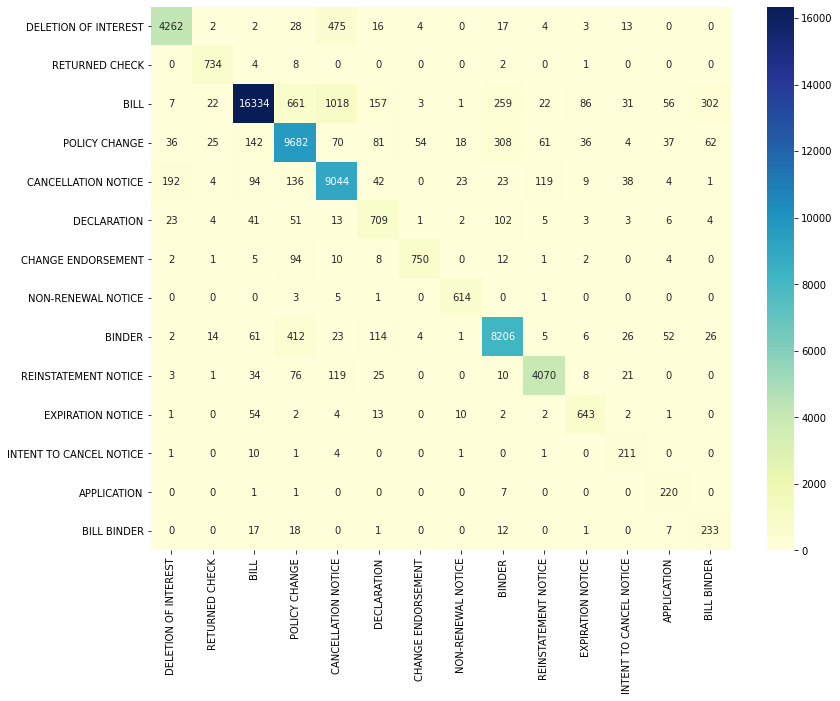

In [13]:
#Heatmap with number of documents
plt.figure(figsize=[13,10])
sns.heatmap(df1, annot=True, fmt="d", cmap="YlGnBu")

<AxesSubplot:>

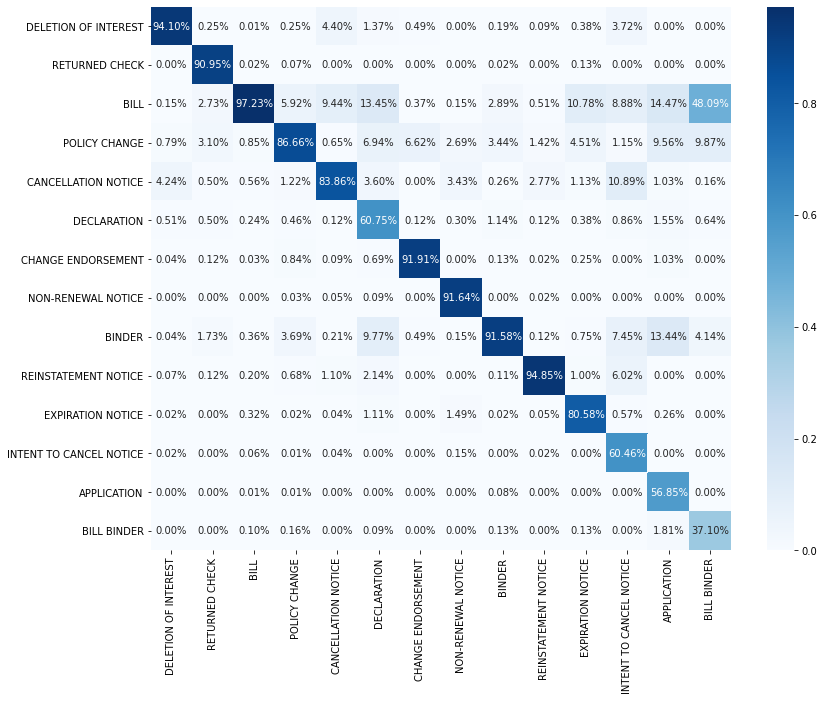

In [14]:
#Heatmap with % documents, this will give us better understanding
plt.figure(figsize=[13,10])
sns.heatmap(df1/np.sum(df1), annot=True, 
            fmt='.2%', cmap='Blues')